In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


def W_energy(EArray, xArray=None, yArray=None):
    if xArray is None or yArray is None:
        shape = np.shape(EArray)
        xArray = np.arange(shape[0])
        yArray = np.arange(shape[1])
    dx = xArray[1] - xArray[0]
    dy = yArray[1] - yArray[0]
    W = np.sum(np.conj(EArray) * EArray, axis=0) * dx * dy
    # total power
    W = np.real(np.sum(W, axis=0))
    return W


def Jz_calc_no_conj(EArray, xArray=None, yArray=None):
    EArray = np.array(EArray)
    Er, Ei = np.real(EArray), np.imag(EArray)
    if xArray is None or yArray is None:
        shape = np.shape(EArray)
        xArray = np.arange(shape[0])
        yArray = np.arange(shape[1])
    x0 = (xArray[-1] + xArray[0]) / 2
    y0 = (yArray[-1] + yArray[0]) / 2
    x = np.array(xArray) - x0
    y = np.array(yArray) - y0
    dx = xArray[1] - xArray[0]
    dy = yArray[1] - yArray[0]
    sumJz = 0
    for i in range(1, len(xArray) - 1, 1):
        for j in range(1, len(yArray) - 1, 1):
            dErx = (Er[i + 1, j] - Er[i - 1, j]) / (2 * dx)
            dEry = (Er[i, j + 1] - Er[i, j - 1]) / (2 * dy)
            dEix = (Ei[i + 1, j] - Ei[i - 1, j]) / (2 * dx)
            dEiy = (Ei[i, j + 1] - Ei[i, j - 1]) / (2 * dy)
            sumJz += (x[i] * Er[i, j] * dEiy - y[j] * Er[i, j] * dEix -
                      x[i] * Ei[i, j] * dEry + y[j] * Ei[i, j] * dErx)
    # Total moment
    Jz = (sumJz * dx * dy)
    W = W_energy(EArray)
    print(f'Total OAM = {Jz / W}\tW={W}')
    return Jz / W


ticksFontSize = 18
xyLabelFontSize = 20
legendFontSize = 20


def plot_2D(E, x=None, y=None, xname='', yname='', map='jet', vmin=None, vmax=None, title='',
            ticksFontSize=ticksFontSize, xyLabelFontSize=xyLabelFontSize,
            axis_equal=False,
            xlim=None, ylim=None, ax=None):
    if x is None:
        x = range(np.shape(E)[0])
    if y is None:
        y = range(np.shape(E)[1])
    if ax is None:
        if axis_equal:
            fig, ax = plt.subplots(figsize=(6, 6))
        else:
            fig, ax = plt.subplots(figsize=(8, 6))
    image = plt.imshow(E,
                       interpolation='bilinear', cmap=map,
                       origin='lower', aspect='auto',  # aspect ration of the axes
                       extent=[y[0], y[-1], x[0], x[-1]],
                       vmin=vmin, vmax=vmax, label='sdfsd')
    cbr = plt.colorbar(image, shrink=0.8, pad=0.02, fraction=0.1)
    cbr.ax.tick_params(labelsize=ticksFontSize)
    plt.xticks(fontsize=ticksFontSize)
    plt.yticks(fontsize=ticksFontSize)
    ax.set_xlabel(xname, fontsize=xyLabelFontSize)
    ax.set_ylabel(yname, fontsize=xyLabelFontSize)
    plt.title(title, fontweight="bold", fontsize=26)
    if axis_equal:
        ax.set_aspect('equal', adjustable='box')
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])
    plt.tight_layout()
    return ax


def readingFile(fileName, fieldToRead="p_charges", printV=False):
    matFile = sio.loadmat(fileName, appendmat=False)
    if printV:
        print(matFile)
        exit()
    return np.array(matFile[fieldToRead])



In [2]:
Ex = readingFile('data\\Efield_3.5umabouve.mat', fieldToRead='Ex_f')
Ey = readingFile('data\\Efield_3.5umabouve.mat', fieldToRead='Ey_f')

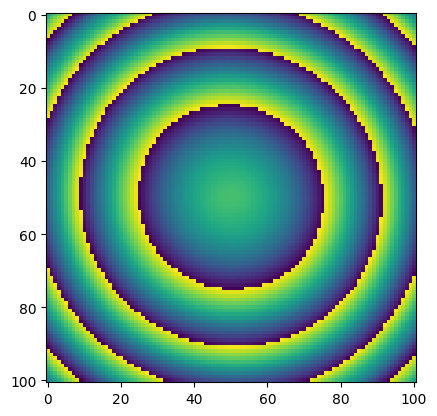

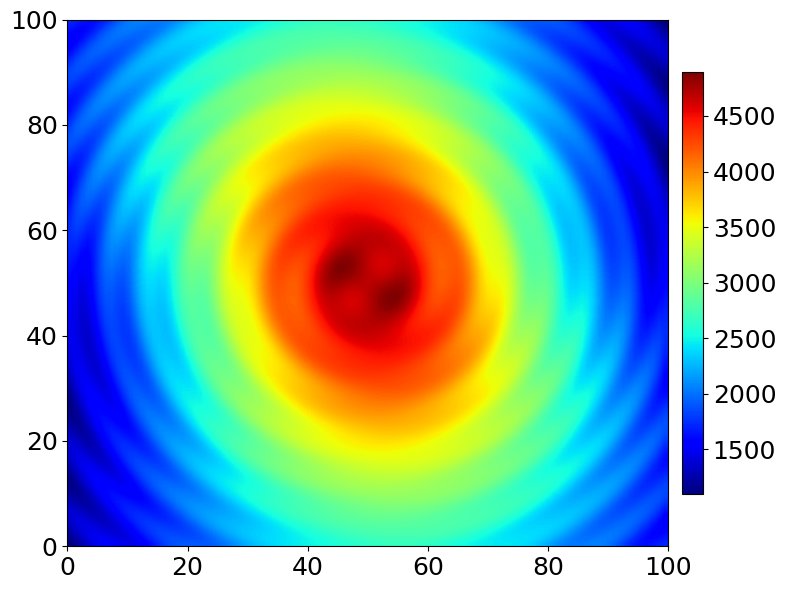

Total OAM = -0.064812707570286	W=87548242606.97429


-0.064812707570286

In [3]:
field=Ey
plt.imshow(np.angle(field))
import my_functions.plotings as pl
pl.plot_2D(np.abs(field))
Jz_calc_no_conj(field)

In [4]:
filename='data\\Efield_0.5umabouve_noHMM.mat'
Ex = readingFile(filename, fieldToRead='Ex_f')
Ey = readingFile(filename, fieldToRead='Ey_f')


Total OAM = -0.22038259881114267	W=3524552728641018.5


-0.22038259881114267

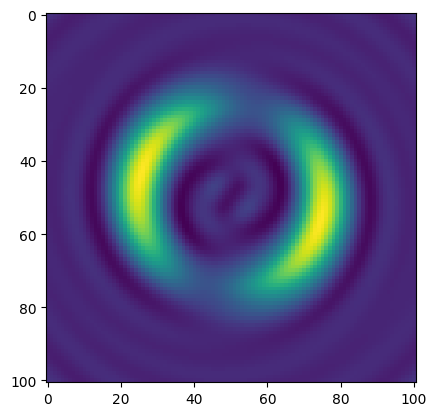

In [5]:
field=Ex
plt.imshow(np.abs(field))
Jz_calc_no_conj(field)

In [6]:
filename='data\\Efield_3.5umabouve_noHMM.mat'
Ex = readingFile(filename, fieldToRead='Ex_f')
Ey = readingFile(filename, fieldToRead='Ey_f')


Total OAM = -0.20626112700369467	W=3478420092098893.0


-0.20626112700369467

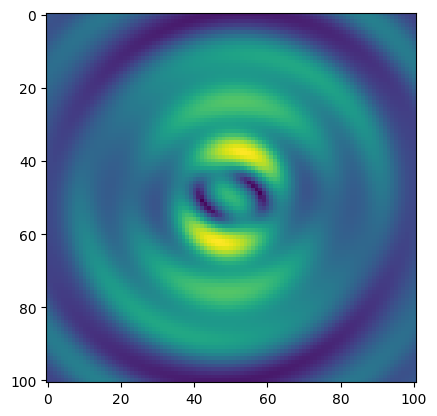

In [7]:
field=Ey
plt.imshow(np.abs(field))
Jz_calc_no_conj(field)

In [8]:
filename='data\\Efield_3.5umabouve.mat'
Ex = readingFile(filename, fieldToRead='Ex_f')
Ey = readingFile(filename, fieldToRead='Ey_f')


Total OAM = -0.06481271568551475	W=87548231645.02043


-0.06481271568551475

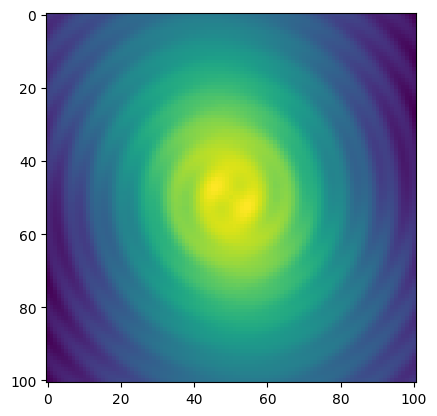

In [9]:
field=Ex
plt.imshow(np.abs(field))
# pl.plot_2D(np.angle(field))
Jz_calc_no_conj(field)

In [10]:
exit()
field = UV
plt.subplot(1,2,1)
plt.imshow(np.abs(field))
Jz_calc_no_conj(field)

NameError: name 'UV' is not defined